In [54]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [55]:
# Load your dataset
df = pd.read_csv('statsfinal.csv')
df.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [56]:
#here Q1- Total unit sales of product 1
#Q2- Total unit sales of product 2
#Q3- Total unit sales of product 3
#Q4- Total unit sales of product 4
#S1- Total revenue from product 1
#S2- Total revenue from product 2
#S3- Total revenue from product 3
#S4- Total revenue from product 4

In [57]:
pd.options.display.max_columns=50
sns.set(style="darkgrid")

In [58]:
# Fethcing rows and columns
df.shape

(4600, 10)

In [59]:
# fetching column names
df.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4'],
      dtype='object')

In [60]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4600 non-null   int64  
 1   Date        4600 non-null   object 
 2   Q-P1        4600 non-null   int64  
 3   Q-P2        4600 non-null   int64  
 4   Q-P3        4600 non-null   int64  
 5   Q-P4        4600 non-null   int64  
 6   S-P1        4600 non-null   float64
 7   S-P2        4600 non-null   float64
 8   S-P3        4600 non-null   float64
 9   S-P4        4600 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 359.5+ KB


In [61]:
# Checking null values
df.isnull().sum()

Unnamed: 0    0
Date          0
Q-P1          0
Q-P2          0
Q-P3          0
Q-P4          0
S-P1          0
S-P2          0
S-P3          0
S-P4          0
dtype: int64

In [62]:
# Checking Dtypes
df.dtypes

Unnamed: 0      int64
Date           object
Q-P1            int64
Q-P2            int64
Q-P3            int64
Q-P4            int64
S-P1          float64
S-P2          float64
S-P3          float64
S-P4          float64
dtype: object

In [63]:
df.duplicated().sum()

0

In [64]:
## Basic statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4600.0,2299.500000,1328.049949,0.00,1149.750,2299.500,3449.250,4599.00
Q-P1,4600.0,4121.849130,2244.271323,254.00,2150.500,4137.000,6072.000,7998.00
Q-P2,4600.0,2130.281522,1089.783705,251.00,1167.750,2134.000,3070.250,3998.00
Q-P3,4600.0,3145.740000,1671.832231,250.00,1695.750,3202.500,4569.000,6000.00
Q-P4,4600.0,1123.500000,497.385676,250.00,696.000,1136.500,1544.000,2000.00
S-P1,4600.0,13066.261743,7114.340094,805.18,6817.085,13114.290,19248.240,25353.66
S-P2,4600.0,13505.984848,6909.228687,1591.34,7403.535,13529.560,19465.385,25347.32
S-P3,4600.0,17049.910800,9061.330694,1355.00,9190.965,17357.550,24763.980,32520.00
S-P4,4600.0,8010.555000,3546.359869,1782.50,4962.480,8103.245,11008.720,14260.00


In [65]:
df.sample(2)
# Changing dtype 
from datetime import datetime as dt
df[df["Date"]=="31-9-2010"]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df[df['Date'].isnull()]
## Filling the NaT  values with average of time
df["Date"].fillna(df["Date"].mean(),inplace=True)
df['Date'].isnull().sum()
#fetching month,day of week, weekday
df["month"]=df["Date"].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df["dayoftheweek"]=df["Date"].dt.weekday
df["year"]=df["Date"].dt.year
df.sample()

C:\Users\Gowtham\AppData\Local\Temp\ipykernel_19432\2214987012.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month,day,dayoftheweek,year
2837,2837,2018-01-04,4687,907,4835,1500,14857.79,5750.38,26205.7,10695.0,January,Thursday,3,2018


In [66]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
Q-P1                     int64
Q-P2                     int64
Q-P3                     int64
Q-P4                     int64
S-P1                   float64
S-P2                   float64
S-P3                   float64
S-P4                   float64
month                   object
day                     object
dayoftheweek             int64
year                     int64
dtype: object

In [67]:
# Create lag features for the target variable (e.g., lag of S-P1)
num_lags = 7  # You can adjust this value based on your dataset
for i in range(1, num_lags + 1):
    df[f'S-P1_lag_{i}'] = df['S-P1'].shift(i)

# Drop rows with missing values created by the lag
df.dropna(inplace=True)


In [68]:

X = df.drop('S-P1', axis=1)  # Features
y = df['S-P1']  # Target variable



In [69]:
X = df.drop(['S-P1', 'Date'], axis=1)  # Features without 'S-P1' and 'Date'
y = df['S-P1']  # Target variable


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Separate features (Q1-Q4) and target variables (S1-S4)
X = df[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']]
y = df[['S-P1', 'S-P2', 'S-P3', 'S-P4']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [74]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.0539070830897841e-23
R-squared: 1.0


In [76]:
# Example: Predict future sales for a new set of product quantities (Q1-Q4)
new_data = np.array([[1000, 2000, 3000, 4000]])  # Replace with your desired input
predicted_revenue = model.predict(new_data)
print("Predicted Revenue:", predicted_revenue)


Predicted Revenue: [[ 3170. 12680. 16260. 28520.]]


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


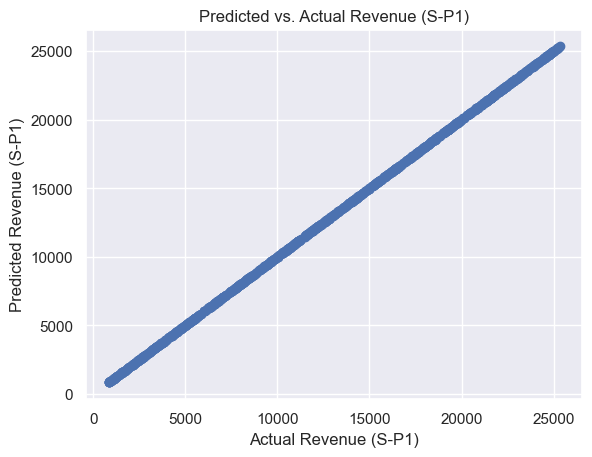

In [78]:
# Scatter plot for S-P1 (Product 1)
plt.scatter(y_test['S-P1'], y_pred[:, 0])
plt.xlabel("Actual Revenue (S-P1)")
plt.ylabel("Predicted Revenue (S-P1)")
plt.title("Predicted vs. Actual Revenue (S-P1)")
plt.show()

# Repeat the above code for S-P2, S-P3, and S-P4 to create scatter plots for each product.


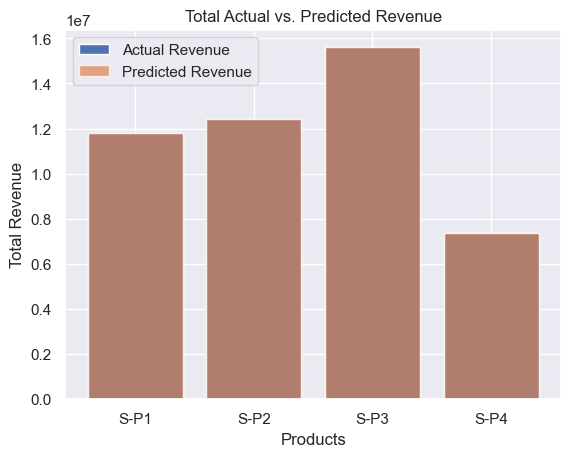

In [79]:
# Calculate the total actual revenue and total predicted revenue
total_actual_revenue = y_test.sum(axis=0)
total_predicted_revenue = y_pred.sum(axis=0)

# Create a bar plot to compare total actual and predicted revenue for each product
plt.bar(['S-P1', 'S-P2', 'S-P3', 'S-P4'], total_actual_revenue, label='Actual Revenue')
plt.bar(['S-P1', 'S-P2', 'S-P3', 'S-P4'], total_predicted_revenue, label='Predicted Revenue', alpha=0.7)
plt.xlabel("Products")
plt.ylabel("Total Revenue")
plt.title("Total Actual vs. Predicted Revenue")
plt.legend()
plt.show()
